In [1]:
import cv2
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [132]:
source = cv2.imread("./sample.png").astype(float)[::4 * 4 * 4,::4 * 4 * 4,:] / 255

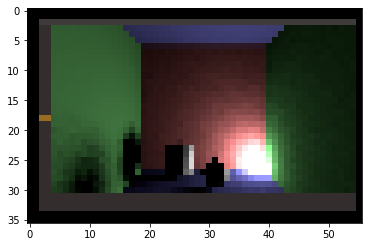

In [133]:
plt.imshow(source)

In [134]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
from IPython.display import clear_output

In [145]:
def MCMC(N=300):
    destination = np.zeros_like(source)
    position = (np.random.random(2) * destination.shape[:2]).astype(int)
    old = source[position[0], position[1]]
    oldP = np.linalg.norm(old)
    size = destination.shape[0] * destination.shape[1]
    for i in range(N):
        delta = np.random.randn(2)
        newPos = position + delta.astype(int)
        newPos = np.maximum(newPos, 0)
        newPos = np.minimum(newPos, np.array(source.shape[:2]) - 1)
        new = source[newPos[0], newPos[1]]
        newP = np.linalg.norm(new)
        P = newP / oldP
        if np.random.random(1) < P:
            destination[newPos[0], newPos[1]] += new / P
            position = newPos
            old = new
            oldP = newP
        else:
            destination[newPos[0], newPos[1]] += old / (1 - P)

        if i % destination.shape[0] == 0:
            clear_output(wait=True)
            plt.pause(0.001)
            fig, _ = plt.subplots()
            fig.set_dpi(100)
            d = destination / i * size
            plt.imshow(d / (d + 1))
            print(i / N)
    clear_output(wait=True)
    plt.imshow(destination / N * size)

In [146]:
result = MCMC(N=300_000)

KeyboardInterrupt: 